In [26]:

import glob,os
import math
import matplotlib.pyplot as plt
import numpy as np
torch.manual_seed(125)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(125)


In [47]:
#read train dataset
train_dir = r'C:\Users\alwaysmle\Desktop\pytorch\inf_hand\big_thres'
train_names = glob.glob(os.path.join(train_dir, '*') )
train_numpy = []
train_name = []
for image_path in train_names:
    alphabet = image_path[-5]
    print(alphabet)
    alphabet = ord(alphabet)-97
    alp_arr = [alphabet] * 45
    im = np.load(image_path)
    train_numpy.append(im[5:])
    train_name.append(alp_arr)
    print(alphabet,len(train_numpy))
train_numpy = np.array(train_numpy).reshape(([-1,3,300])).astype('float')
train_numpy = np.transpose(train_numpy, (0, 2, 1))
train_name = np.array(train_name).reshape((-1))
np.save('train',train_numpy)
np.save('train_alphabet',train_name)
print(train_numpy.shape)
print(train_name.shape)

a
0 1
b
1 2
c
2 3
d
3 4
e
4 5
f
5 6
g
6 7
h
7 8
h
7 9
i
8 10
j
9 11
k
10 12
l
11 13
m
12 14
n
13 15
o
14 16
p
15 17
p
15 18
q
16 19
r
17 20
s
18 21
t
19 22
t
19 23
u
20 24
u
20 25
v
21 26
w
22 27
x
23 28
x
23 29
y
24 30
z
25 31
(1395, 300, 3)
(1395,)


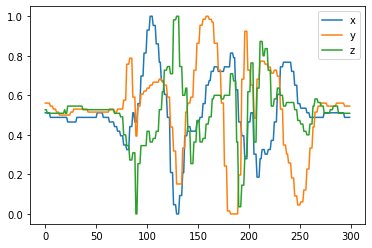

In [48]:
for i in range(len(train_numpy)):
    for k in range(3):
        max_num = np.max(train_numpy[i,:,k])
        min_num = np.min(train_numpy[i,:,k])
        if((max_num - min_num)!= 0):
            train_numpy[i,:,k] = (train_numpy[i,:,k]-min_num)/(max_num - min_num)
        else:
            train_numpy[i,:,k] = 0
plt.plot(train_numpy[1,:,0],label='x')
plt.plot(train_numpy[1,:,1],label='y')
plt.plot(train_numpy[1,:,2],label='z')
plt.legend()

In [49]:
#from scipy.fftpack import fft  
from scipy.fft import fft
import numpy as np  
y = fft(train_numpy)  
for i in range(len(train_numpy)):
    for k in range(3):
        train_numpy[i,:,k] = np.abs(fft(train_numpy[i,:,k]))

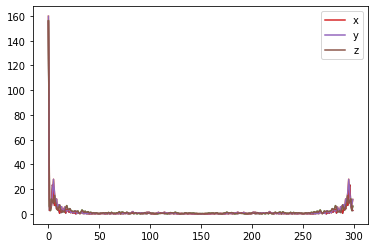

In [51]:
#plot fourier transform
plt.plot(train_numpy[1,:,0])
plt.plot(train_numpy[1,:,1])
plt.plot(train_numpy[1,:,2])
plt.plot(train_numpy[1,:,0],label='x')
plt.plot(train_numpy[1,:,1],label='y')
plt.plot(train_numpy[1,:,2],label='z')
plt.legend()

In [10]:
#split dataset
from sklearn.model_selection import train_test_split
train_numpy = train_numpy.reshape(-1,900)
x_train, x_test, y_train, y_test = train_test_split(train_numpy, train_name, test_size=0.3)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=1/3)

In [32]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=25)
x_train_pca = pca.fit_transform(x_train)
x_val_pca = pca.transform(x_val)
x_test_pca = pca.transform(x_test)
np.cumsum(pca.explained_variance_ratio_)
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('principle components')
plt.ylabel('explain variance')

In [ ]:
# Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
x_train_lda = clf.fit_transform(x_train, y_train)
x_val_lda = clf.transform(x_val)
x_test_lda = clf.transform(x_test)

In [23]:
#PCA + Random Forest
from sklearn.ensemble import RandomForestClassifier
for depth in range(1,25):
  rf = RandomForestClassifier(max_depth=depth, random_state=0)
  rf.fit(x_train_pca, y_train)
  val_acc = (rf.predict(x_val_pca) == y_val ).sum() / y_val.shape[0]
  print(depth,val_acc)
  
rf = RandomForestClassifier(max_depth=16, random_state=0)
rf.fit(x_train_pca, y_train)
val_acc = (rf.predict(x_test_pca) == y_test ).sum() / y_test.shape[0]
print(val_acc)

1 0.22142857142857142
2 0.45714285714285713
3 0.6785714285714286
4 0.8142857142857143
5 0.8785714285714286
6 0.9285714285714286
7 0.9285714285714286
8 0.9428571428571428
9 0.9571428571428572
10 0.9571428571428572
11 0.9571428571428572
12 0.9642857142857143
13 0.9571428571428572
14 0.9642857142857143
15 0.9642857142857143
16 0.9785714285714285
17 0.9571428571428572
18 0.9571428571428572
19 0.9714285714285714
20 0.9714285714285714
21 0.9642857142857143
22 0.9642857142857143
23 0.9642857142857143
24 0.9642857142857143
0.9605734767025089


In [24]:
#PCA + Support vector machine
from sklearn.svm import SVC
rf = SVC()
rf.fit(x_train_pca, y_train)
val_acc = (rf.predict(x_val_pca) == y_val ).sum() / y_val.shape[0]
print(val_acc)
  
val_acc = (rf.predict(x_test_pca) == y_test ).sum() / y_test.shape[0]
print(val_acc)

0.9928571428571429
0.974910394265233


In [18]:
#LDA + Random forest
from sklearn.ensemble import RandomForestClassifier
for depth in range(1,25):
  rf = RandomForestClassifier(max_depth=depth, random_state=0)
  rf.fit(x_train_lda, y_train)
  val_acc = (rf.predict(x_val_lda) == y_val ).sum() / y_val.shape[0]
  print(depth,val_acc)
  
rf = RandomForestClassifier(max_depth=7, random_state=0)
rf.fit(x_train_lda, y_train)
val_acc = (rf.predict(x_test_lda) == y_test ).sum() / y_test.shape[0]
print(val_acc)

1 0.24285714285714285
2 0.35714285714285715
3 0.5928571428571429
4 0.6857142857142857
5 0.7928571428571428
6 0.8428571428571429
7 0.8642857142857143
8 0.8357142857142857
9 0.8571428571428571
10 0.85
11 0.8571428571428571
12 0.8714285714285714
13 0.8642857142857143
14 0.8428571428571429
15 0.8571428571428571
16 0.8428571428571429
17 0.8642857142857143
18 0.8714285714285714
19 0.8642857142857143
20 0.8642857142857143
21 0.8642857142857143
22 0.8642857142857143
23 0.8642857142857143
24 0.8642857142857143
0.8566308243727598


In [19]:
#LDA + Support vector machine
from sklearn.svm import SVC
rf = SVC()
rf.fit(x_train_lda, y_train)
val_acc = (rf.predict(x_val_lda) == y_val ).sum() / y_val.shape[0]
print(val_acc)
val_acc = (rf.predict(x_test_lda) == y_test ).sum() / y_test.shape[0]
print(val_acc)

0.9
0.9175627240143369
